## a) First the robot needs to estimate its current location and then determine the most likely path it has taken to get where it is now for a given time t

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

states = []
m=0
no_of_state=0
open_path=0
#Map given in the question
Map=np.zeros((4,16))
obstacles=[[0,4],[0,10],[0,14],[1,0],[1,1],[1,4],[1,6],[1,7],[1,9],[1,11],[1,13],[1,14],[1,15],[2,0],[2,4],[2,6],
           [2,13],[2,14],[3,2],[3,6],[3,11]]


global error
error=0.2

def make_trans_matrix(): # Making transition matrix
    global trans
    c = 0
    for (x,y) in states:
        neighbours = fetch_neighbours(x,y)
        #print(neighbours)
        total = len(neighbours)
        for i in range(total):
            index = states.index(neighbours[i])
            trans[c][index] = 1/float(total)
        c += 1
        
def fetch_neighbours(i,j): #get the available neighbours
    neighbour = []
    if i - 1 >= 0 and Map[i - 1][j] == 0: 
        neighbour.append((i - 1, j))
    if j - 1 >= 0 and Map[i][j - 1] == 0: 
        neighbour.append((i, j - 1))
    if i + 1 < len(Map) and Map[i + 1][j] == 0: 
        neighbour.append((i + 1, j))
    if j + 1 < len(Map[0]) and Map[i][j + 1] == 0: 
        neighbour.append((i, j + 1))
    
    return neighbour



def if_error():
    random = np.random.uniform(0,1)
    if random > error : 
        return False
    else : 
        return True

def estimate_observation_seq():	# get obs sequence with error in sensors 
    global observation_seq
    observation_seq=[]
    for i in travelled_path:
        (x,y) = i
        sensor_reading = [0,0,0,0]
    
        if ((x-1) < 0 or (Map[x-1][y] == 1)):
                if not if_error(): 
                    sensor_reading[0] = 1
        
        if ((x + 1) >= len(Map) or Map[x + 1][y] == 1):
                if not if_error(): 
                    sensor_reading[1] = 1
       
        if ((y + 1) >= len(Map[0]) or Map[x][y+1] == 1):
                if not if_error(): 
                    sensor_reading[2] = 1
        
        if ((y - 1) < 0 or Map[x][y-1] == 1):
                if not if_error(): 
                    sensor_reading[3] = 1
        observation_seq.append(sensor_reading)
        
def gen_true_obs(i,j):		# True observation
    true_obs = [0,0,0,0]
    if i - 1 < 0 or Map[i - 1][j] == 1: 
        true_obs[0] = 1
    if i + 1 >= len(Map) or Map[i + 1][j] == 1: 
        true_obs[1] = 1
    if j + 1 >= len(Map[0]) or Map[i][j + 1] == 1: 
        true_obs[2] = 1
    if j - 1 < 0 or Map[i][j - 1] == 1: 
        true_obs[3] = 1
    return true_obs

def DIT(true_observation, estimated_observation):
    c = 0;
    for i in range(0, 4):
        if true_observation[i] != estimated_observation[i]: 
            c += 1
    return c

def generate_observation(i): 	 # observation matrix from observation sequence calculated 
    global observation
    count = 0
    est_obs = observation_seq[i]
    for (x, y) in states:
        true_obs = gen_true_obs(x, y)
        dit = DIT(true_obs, est_obs)
        result = math.pow(1-error, 4 - dit) * math.pow(error, dit)
        observation[count][count] = result
        count += 1
        
def robot_localization():   #Localize the robot and get most likely path it has taken
    f = pi
    t_path = []
    for i in range(len(observation_seq)):
        generate_observation(i)
        f = np.matmul(observation, np.matmul(np.transpose(trans), f))
        index = np.argmax(f)
        x, y =  states[index]
        t_path.append((x,y))
    print("Location:")
    print((x,y))
    print("Travelled Path: ")
    print(t_path)
    
   
    
def path_travelled(value):
    global travelled_path
    travelled_path = []
    travelled_path.extend(value)


def fixed_error_localize():
    for i in range(len(actual_path)):
            path_travelled(actual_path[i])
            estimate_observation_seq()
            robot_localization()
            
            #localizeRobot()

m=0                      
for i in range(len(obstacles)):
    for j in range(len(obstacles[i])):
        #print(obstacles[i][j])
        if m==0:
            x=obstacles[i][j]
            m+=1
        else:
            y=obstacles[i][j] 
            Map[x][y]=1
            m=0

for i in range(len(Map)):
        for j in range(len(Map[0])):
            if (Map[i][j] == 0): 
                states.append((i, j))

no_of_state=(len(Map)*len(Map[0]))-(len(obstacles))
print(no_of_state)
trans = np.zeros([no_of_state,no_of_state])
observation = np.zeros([no_of_state,no_of_state])
pi = np.full([no_of_state,1], 1/float(no_of_state))
make_trans_matrix()
actual_path=[[(3,0),(3,1),(2,1),(2,2),(2,3)],
             [(0, 2), (1, 2), (2, 2), (2, 3), (3, 3), (3, 4)],
             [(2, 2), (2, 3), (3, 3), (3, 4), (3, 5), (2, 5), (1, 5), (0, 5), (0, 6)],
             [(3, 8), (2, 8), (2, 9), (2, 10), (2, 11), (2, 12), (3, 12), (3, 13), (3, 14), (3, 15), (2, 15)],
             [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (2, 3), (3, 3), (3, 4), (3, 5), (2, 5),(1, 5), (0, 5), (0, 6), (0, 7)],
             [(0, 0), (0, 1), (0, 2), (0, 3), (1, 3), (2, 3), (3, 3), (3, 4), (3, 5), (2, 5), (1, 5), (0, 5), (0, 6), (0, 7), (0, 8), (1, 8), (2, 8),(3, 8),(3, 9),(3, 10)]]
'''
actual_path = [[(1,0),(2,0),(2,1),(3,1),(3,2)],
                [(0,0),(1,0),(2,0),(2,1),(2,2),(3,2)],
               [(0,0),(0,1),(0,2),(1,2),(1,3),(2,3),(2,2)],
               [(2,3),(2,2),(3,2),(3,2),(3,1),(3,0),(2,0),(1,0),(0,0)],
              [(3,1),(2,1),(2,2),(2,3),(1,3),(1,2),(0,2),(0,1),(0,0)]]
#print(trans)
'''
fixed_error_localize()
        
#print(Map)
#print(trans)




43
Location:
(2, 3)
Travelled Path: 
[(0, 0), (3, 1), (2, 1), (2, 2), (2, 3)]
Location:
(3, 4)
Travelled Path: 
[(0, 12), (1, 2), (2, 2), (2, 3), (3, 3), (3, 4)]
Location:
(0, 6)
Travelled Path: 
[(2, 2), (2, 3), (2, 2), (2, 9), (3, 1), (1, 2), (1, 5), (0, 5), (0, 6)]
Location:
(1, 10)
Travelled Path: 
[(2, 10), (2, 9), (2, 9), (2, 8), (2, 11), (2, 12), (3, 12), (3, 13), (3, 12), (2, 12), (1, 10)]
Location:
(0, 7)
Travelled Path: 
[(3, 3), (3, 4), (0, 2), (1, 2), (2, 2), (2, 3), (3, 3), (3, 4), (3, 5), (2, 5), (1, 5), (0, 5), (0, 6), (0, 7)]
Location:
(3, 10)
Travelled Path: 
[(1, 2), (2, 11), (0, 8), (0, 3), (1, 3), (2, 3), (3, 3), (3, 4), (3, 5), (2, 5), (1, 5), (2, 5), (0, 6), (0, 7), (0, 8), (1, 8), (2, 8), (3, 8), (3, 9), (3, 10)]






## (b) Repeat (a) and find out the localization error as a function of number of observations for various values of E (0.00,0.02,0.05,0.10,0.20) and plot them. Localization error is Manhattan distance from the true location

20
('Travelled Path: ', [(0, 5), (3, 1), (2, 1), (2, 2), (2, 3)])
('Travelled Path: ', [(0, 12), (2, 8), (2, 8), (2, 3), (3, 3), (3, 8)])
('Travelled Path: ', [(2, 2), (2, 8), (3, 7), (3, 4), (3, 5), (2, 5), (3, 5), (0, 5), (0, 6)])
('Travelled Path: ', [(2, 2), (2, 8), (2, 9), (2, 8), (2, 11), (2, 12), (3, 12), (3, 13), (3, 14), (3, 15), (2, 15)])
('Travelled Path: ', [(3, 3), (3, 8), (2, 9), (1, 2), (2, 2), (2, 3), (3, 3), (3, 4), (3, 5), (2, 3), (1, 5), (0, 5), (0, 6), (0, 7)])
('Travelled Path: ', [(0, 0), (0, 1), (0, 2), (0, 3), (0, 2), (2, 3), (3, 3), (2, 3), (2, 2), (2, 3), (1, 3), (1, 2), (0, 6), (1, 2), (0, 2), (1, 2), (2, 8), (3, 8), (3, 9), (3, 10)])
_____________________________________________________________________________________________________




('Localization error: ', [8, 27, 11, 9, 27, 34])
('observation:', [5, 6, 9, 11, 14, 20])
('Error', 0)
('Travelled Path: ', [(0, 0), (3, 1), (2, 1), (2, 2), (2, 3)])
('Travelled Path: ', [(0, 12), (1, 2), (2, 2), (2, 3), (3, 

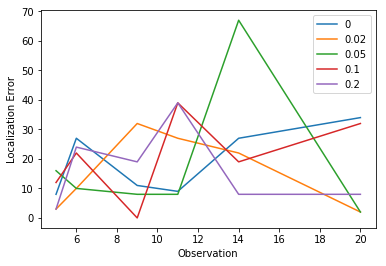

In [2]:
error_array = [0,0.02,0.05,0.10,0.20]
observation_number=[]
path_accuracy_lst=[]
flag=0
localisation_error = []
def get_dist(actual, x, y):	# manhattan distance
    x1 , y1 = actual
    dist = abs(x1 - x) + abs(y1 - y)
    return dist

def path_acc(t_path):		#get path accuracy
    correct = 0
    path_len = len(travelled_path)
    for i in range(path_len):
        if(travelled_path[i] == t_path[i]): 
            correct += 1

    accuracy = correct/float(path_len)
    return accuracy;

def robot_localization_(flag):   #function to calculate localization error and path accuracy
    f = pi
    manhanttan_dist = []
    est_path = []
    t_path_ = []
    distance = 0
    for i in range(len(observation_seq)):
        generate_observation(i)
        f = np.matmul(observation, np.matmul(np.transpose(trans), f))
        index = np.argmax(f)
        x, y =  states[index]
        temp_dist=get_dist(travelled_path[i], x,y)
        manhanttan_dist.append(temp_dist)
        if(flag==1):
            m = viterbi_algo()
            est_path.append(states[m])
        distance = sum(manhanttan_dist)
        t_path_.append((x,y))
    if(flag==1):
        path_accuracy = path_acc(t_path_)
        path_accuracy_lst.append(path_accuracy)
    observation_number.append(len(observation_seq))
    localisation_error.append(distance)
    print("Travelled Path: ", t_path_)
    t_path_=[]
    
def diff_error_localize():
    for i in range(len(error_array)):
        del observation_number[:]
        del localisation_error[:]
        error = error_array[i]
        for j in range(len(actual_path)):
            path_travelled(actual_path[j])
            estimate_observation_seq()
            robot_localization_(flag)
        print("_____________________________________________________________________________________________________")
        print("\n\n\n")
        print("Localization error: ", localisation_error)
        print("observation:",observation_number)
        plt.figure(1)
        plt.xlabel("Observation")
        plt.ylabel("Localization Error")
        print("Error", error)
        plt.plot(observation_number, localisation_error,label=str(error))
    plt.figure(1)
    plt.legend()
    plt.show()

    

print(len(observation_seq))
diff_error_localize()
    


# Part C
## Repeat (b) for path accuracy, which is defined as the fraction of correct states on the Viterbi path.

('Travelled Path: ', [(0, 5), (3, 1), (2, 1), (2, 2), (2, 3)])
('Travelled Path: ', [(0, 12), (1, 2), (2, 2), (2, 3), (3, 3), (3, 4)])
('Travelled Path: ', [(2, 2), (2, 3), (3, 3), (3, 4), (3, 5), (2, 5), (1, 5), (0, 5), (0, 6)])
('Travelled Path: ', [(2, 2), (2, 8), (2, 9), (2, 8), (3, 8), (2, 8), (3, 12), (3, 13), (3, 14), (3, 15), (2, 15)])
('Travelled Path: ', [(0, 5), (0, 2), (0, 2), (1, 2), (2, 2), (2, 3), (2, 2), (3, 4), (3, 5), (2, 5), (1, 5), (0, 5), (0, 6), (0, 5)])
('Travelled Path: ', [(2, 2), (3, 14), (0, 8), (0, 3), (1, 3), (2, 3), (3, 3), (3, 4), (3, 5), (2, 5), (1, 5), (0, 5), (0, 6), (0, 5), (0, 8), (1, 8), (2, 8), (3, 8), (3, 9), (3, 10)])
_____________________________________________________________________________________________________




('Path Accuracy: ', [0.8, 0.8333333333333334, 1.0, 0.6363636363636364, 0.7142857142857143, 0.8])
('Localization error: ', [8, 10, 0, 17, 10, 28])
('Error', 0)
('Travelled Path: ', [(0, 0), (3, 1), (2, 1), (2, 2), (2, 3)])
('Trav

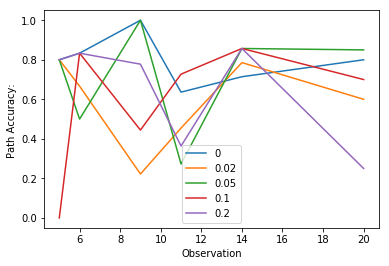

In [3]:

def viterbi_algo(): # viterbi algorithm
    arr1 = np.full([1, no_of_state], 1 / float(no_of_state))
    arr2 = np.multiply(np.transpose(trans), arr1)
    arr3 = np.amax(arr2, axis=1)
    temp_res = np.matmul(observation, arr3)
    max_index = np.argmax(temp_res)
    return max_index


def diff_error_localize_():
    for i in range(len(error_array)):
        del observation_number[:]
        del localisation_error[:]
        del path_accuracy_lst[:]
        error = error_array[i]
        for j in range(len(actual_path)):
            path_travelled(actual_path[j])
            estimate_observation_seq()
            flag=1
            robot_localization_(flag)
        print("_____________________________________________________________________________________________________")
        print("\n\n\n")
        print("Path Accuracy: ", path_accuracy_lst)
        print("Localization error: ", localisation_error)
        print("Error", error)
        
        plt.figure(2)
        plt.xlabel("Observation")
        plt.ylabel("Path Accuracy: ")
        plt.plot(observation_number, path_accuracy_lst, label=str(error))
    plt.figure(2)
    plt.legend()
    plt.show()

diff_error_localize_()